Question 01


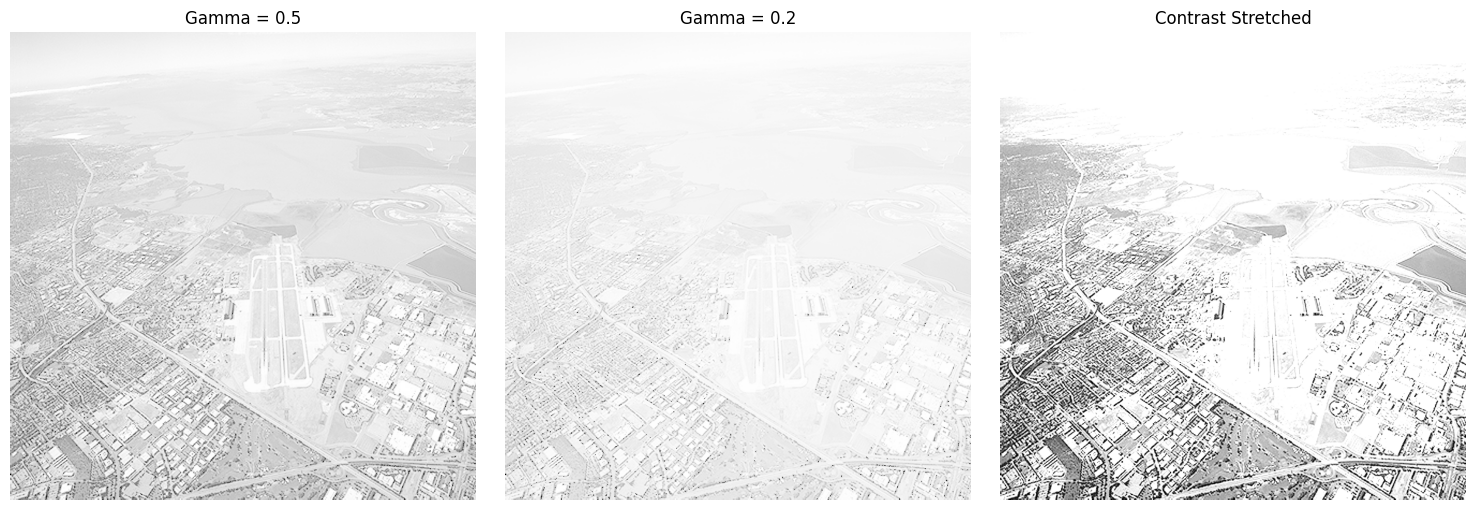

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_intensity_transform(image_path, gamma):
    img = cv2.imread(image_path)
    # Matplotlib wala display karanna BGR to RGB convert karanna ona
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_normalized = img / 255.0
    res = np.power(img_normalized, gamma)
    res = np.uint8(res * 255)
    return res

def apply_contrast_stretch(image_path, r1=0.2, r2=0.8):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r = img.astype(np.float32) / 255.0
    s = np.zeros_like(r)
    mask_middle = (r >= r1) & (r <= r2)
    s[mask_middle] = (r[mask_middle] - r1) / (r2 - r1)
    mask_high = (r > r2)
    s[mask_high] = 1.0
    output = (s * 255).astype(np.uint8)
    return output

#(a)
output_img_a = apply_intensity_transform('runway.png', 0.5)
#(b)
output_img_b = apply_intensity_transform('runway.png', 0.2)
#(c)
output_img_c = apply_contrast_stretch('runway.png', 0.2, 0.8)

# Matplotlib subplots use kara
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(output_img_a)
axes[0].set_title('Gamma = 0.5')
axes[0].axis('off')

axes[1].imshow(output_img_b)
axes[1].set_title('Gamma = 0.2')
axes[1].axis('off')

axes[2].imshow(output_img_c)
axes[2].set_title('Contrast Stretched')
axes[2].axis('off')

plt.tight_layout()
plt.show()